In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(
    "../data/processed/ml_dataset.csv",
    index_col=0,
    parse_dates=True
)

X = data.drop(columns=["risk_label"])
y = data["risk_label"]

# align again for safety
X, y = X.align(y, join="inner", axis=0)


In [3]:
prices = pd.read_csv(
    "../data/raw/prices.csv",
    index_col=0,
    parse_dates=True
)

spy = prices["SPY"].loc[X.index]


In [4]:
split = int(len(X) * 0.7)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]
spy_test = spy.iloc[split:]


In [5]:
from src.models import train_risk_model

model = train_risk_model(X, y)

y_pred = model.predict(X_test)


1676
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       625
           1       0.35      0.35      0.35        94

    accuracy                           0.83       719
   macro avg       0.62      0.63      0.63       719
weighted avg       0.83      0.83      0.83       719



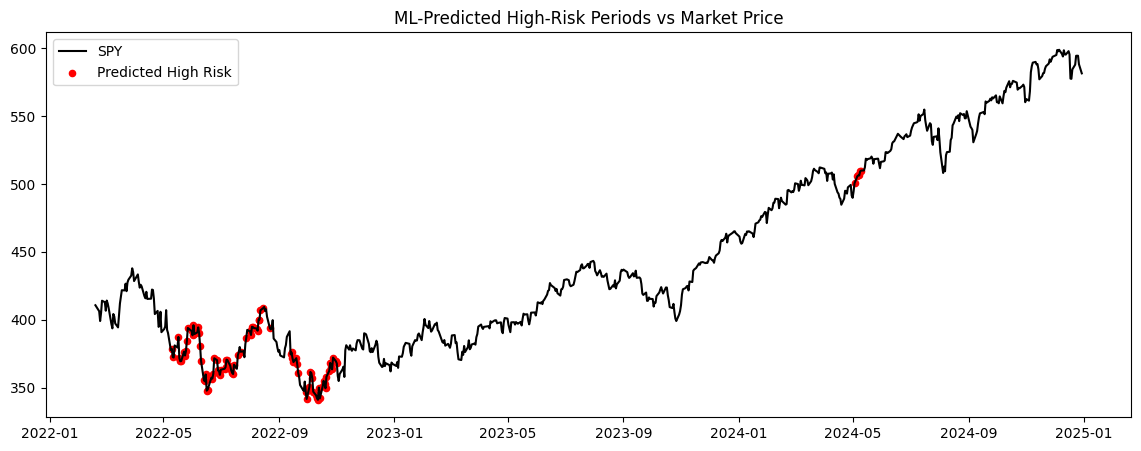

In [6]:
plt.figure(figsize=(14,5))
plt.plot(spy_test.index, spy_test, color="black", label="SPY")

risk_dates = spy_test.index[y_pred == 1]

plt.scatter(
    risk_dates,
    spy_test.loc[risk_dates],
    color="red",
    s=20,
    label="Predicted High Risk"
)

plt.title("ML-Predicted High-Risk Periods vs Market Price")
plt.legend()
plt.show()


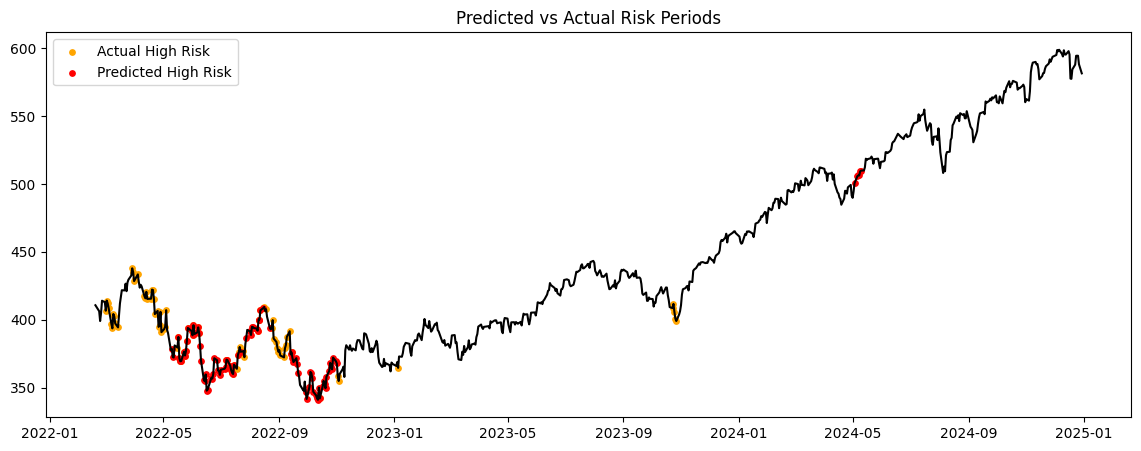

In [7]:
true_risk_dates = spy_test.index[y_test == 1]

plt.figure(figsize=(14,5))
plt.plot(spy_test.index, spy_test, color="black")

plt.scatter(
    true_risk_dates,
    spy_test.loc[true_risk_dates],
    color="orange",
    s=15,
    label="Actual High Risk"
)

plt.scatter(
    risk_dates,
    spy_test.loc[risk_dates],
    color="red",
    s=15,
    label="Predicted High Risk"
)

plt.legend()
plt.title("Predicted vs Actual Risk Periods")
plt.show()
